# Project 2

# Name of Project- Market Basket Analysis in Python using Apriori Algorithm

* Name : Aravalam Rajasekhar
* gmail : rasekhar6@gmail.com
* phone no : 9849692369
* Course : B.Tech (Final Year)
* College : SVU COLLEGE OF ENGINEERING (TIRUPATI)

# Problem Statement :

Whenever you visit a retail supermarket, you will find that baby diapers and wipes, bread and butter, pizza base and cheese, beer, and chips are positioned together in the store for sales. This is what market basket analysis is all about analyzing the association among products bought together by customers. Market basket analysis is a versatile use case in the retail industry that helps cross-sell products in a physical outlet and also helps e-commerce businesses recommend products to customers based on product associations. Apriori and FP growth are the most popular machine learning algorithms used for association learning to perform market basket analysis.

# Apriori Algorithm

* Apriori algorithm is used to find out the most frequently and commonly purchased itemset in the market

# An association mining problem can be decomposed into two subproblems:
* Find all combinations of items in a set of transactions that occur with a specified minimum frequency. These combinations are called frequent itemsets. (See "Frequent Itemsets" for an example.)
* Calculate rules that express the probable co-occurrence of items within frequent itemsets. (See "Example: Calculating Rules from Frequent Itemsets".)
* Apriori calculates the probability of an item being present in a frequent itemset, given that another item or items is present.
* Association rule mining is not recommended for finding associations involving rare events in problem domains with a large number of items. Apriori discovers patterns with frequency above the minimum support threshold. Therefore, in order to find associations involving rare events, the algorithm must run with very low minimum support values. However, doing so could potentially explode the number of enumerated itemsets, especially in cases with a large number of items. This could increase the execution time significantly. Classification or anomaly detection may be more suitable for discovering rare events when the data has a high number of attributes.

# Association Rules :
* The Apriori algorithm calculates rules that express probabilistic relationships between items in frequent itemsets For example, a rule derived from frequent itemsets containing A, B, and C might state that if A and B are included in a transaction, then C is likely to also be included.
* An association rule states that an item or group of items implies the presence of another item with some probability. Unlike decision tree rules, which predict a target, association rules simply express correlation.

# Importing the required Libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df=pd.DataFrame({'transaction_id':[1,2,3,4],'items_list':[['i1','i3','i4'],['i2','i3','i5'],['i1','i2','i3','i5'],['i2','i5']]})

# Displaying the dataset

In [19]:
df

,transaction_id,items_list
0,1,"[i1, i3, i4]"
1,2,"[i2, i3, i5]"
2,3,"[i1, i2, i3, i5]"
3,4,"[i2, i5]"


# About Dataset

* The dataset consists of 2 columns and 4 rows:

# Column info

1. **transaction_id** : tells the transaction id of the set of items purchased

2. **items_list** : describes the name of the item

In [20]:
x=[]
for i in df['items_list']:
  x.extend(i)
x=list(set(x))

In [21]:
count=[0]*len(x)
for i in range(len(x)):
  for j in df['items_list']:
    if x[i] in j:
      count[i]+=1


# Items count in all transactions

Text(0, 0.5, 'Item count in transactions')

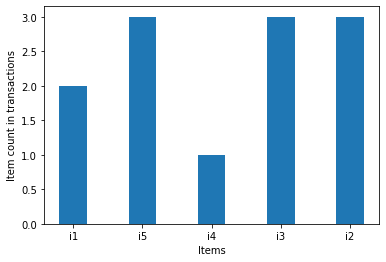

In [22]:
plt.bar(x,count,width=0.4)
plt.xlabel('Items')
plt.ylabel('Item count in transactions')

# Observation in bar chart

* items i5,i3,i2 are purchasing frequently but whether it is purchased commonly or not is to be checked by further process

In [23]:
y,z,w,k,dup=[],[],[],1,[]
for i in x:
  dup.append([i])
x=dup
count=[0]*len(x)

In [24]:
x[0]

['i1']

In [25]:
while True:
  k+=1
  i,j=0,0
  while i<len(x):
    c=0
    for l in x[i]:
      if l in df['items_list'][j]:
        c+=1
    if c==len(x[i]):
      count[i]+=1
    j+=1
    if j==len(df):
      print(x[i],count[i])
      i+=1
      j=0
  w,y,v=[],[],0
  while v<len(count):
    if count[v]>1:
      y.append(x[v])
      w.append([x[v],count[v]])
    v+=1
  def d(u):
    return u[1]
  if len(w)>0:
    z.extend(sorted(w,key=d))
  if len(y)>1:
    i,j,x=0,1,[]
    while i<len(y)-k+1:
      m=list(set(y[i]+y[j]))
      if len(m)==k and m not in x:
        x.append(m)
      j+=1
      if j==len(y):
        i+=1
        j=i+1
    if len(x)>0:
      count=[0]*len(x)
  else:
    break

['i1'] 2
['i5'] 3
['i4'] 1
['i3'] 3
['i2'] 3
['i1', 'i5'] 1
['i1', 'i3'] 2
['i1', 'i2'] 1
['i3', 'i5'] 2
['i2', 'i5'] 3
['i3', 'i2'] 2
['i1', 'i3', 'i5'] 1
['i1', 'i3', 'i2'] 1
['i2', 'i3', 'i5'] 2


In [26]:
z.reverse()
items_sets,support_count=[],[]
for i in z:
  items_sets.append(i[0])
  support_count.append(i[1])
df1=pd.DataFrame({'items_sets':items_sets,'support_count':support_count})

# Itemsets and their support counts

In [27]:
df1

,items_sets,support_count
0,"[i2, i3, i5]",2
1,"[i2, i5]",3
2,"[i3, i2]",2
3,"[i3, i5]",2
4,"[i1, i3]",2
5,[i2],3
6,[i3],3
7,[i5],3
8,[i1],2


# Conclusion :

# The itemset which have highest support count is **[i2,i5,i3] = 2** which means people are more frequently and commonly purchasing i2,i5,i3 items in associative manner.